# Power Transformer 101

## What? 

### Powertransformer is part of sklearn preprocessing module


### The individual transformers can be found inside the SciPy stats module

- The key part of this technique is found right in the name **TRANSFORM** 
- Two data transformers are inside this module 
    - Box-Cox Transformation (will take in **ONLY** positive values) 
    - Yeo Johnson Transformation (can take in **BOTH** positive and negative values) 
    - What about 0? 
        - She ain't no hero here... 
    
    
![alt text](boxcox_beforeafter.png "Title")    

# The Math 

## Lambda can be between -5 and 5

## The Confidence Interval is important! 

![alt text](math_boxcox.png "Title")

## A Quick Demo

In [1]:
#Libraries needed for this demonstration
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import PowerTransformer
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Import the Data, in this case AMES Housing Data. We are only working with one-column 
df = pd.read_csv('./train.csv')

df['Garage Area'].head(10)

0    475.0
1    559.0
2    246.0
3    400.0
4    484.0
5    578.0
6    525.0
7    531.0
8    420.0
9    504.0
Name: Garage Area, dtype: float64

## Some Quick EDA 

In [3]:
df['Garage Area'].isnull().sum()

# there is only one nan object 
df['Garage Area'] = df['Garage Area'].replace(np.nan, 0)

# I am only doing this because the box cox says that there are negative values... which isn't true?

# I **think** it is because  of the zero, and the difference in the transformation which that requires. Yea.. 

df['Garage Area'] = df['Garage Area'].replace(0, 50)

In [4]:
# What don't have any nulls? 
print (df['Garage Area'].isnull().sum())

# We have a non-zero minimun? 
print (df['Garage Area'].min())

0
50.0


In [5]:
garage_area = np.asarray(df['Garage Area'])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


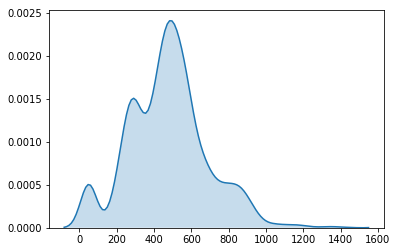

In [6]:
# We can see that this data is screwed, and does not represent a normal distribution 
sns.kdeplot(garage_area, shade=True);

In [7]:
# Values in the Box-Cox Transformation
# xt = (x**lambda - 1) / lambda 

#define the set of lambda's that we want to search over ()
lmbda = np.linspace(start = .5, stop = 1.0, num =4) 

xt = []
lambda_list = []
for i in lmbda: 
    #x = the input data 
    x = garage_area 
    #box-cox transformation 
    transform = (x**i - 1) / i
    #appending the list 
    xt.append(transform)

In [8]:
print ('These are the tranformed values, Box-Cox Transformation for a given Lambda')
print ('--'*50)
print (xt[1]) # we can grab the individual values 
print ('--'*50)
print ('These are the lambdas which we used in this transformation')
print (lmbda) # this is the list of lambda's we generated 

These are the tranformed values, Box-Cox Transformation for a given Lambda
----------------------------------------------------------------------------------------------------
[ 89.81742686 100.28859762  57.39087365 ...  71.85707335  64.82177578
  85.5374393 ]
----------------------------------------------------------------------------------------------------
These are the lambdas which we used in this transformation
[0.5        0.66666667 0.83333333 1.        ]


In [9]:
lmbda[0]

0.5

In [10]:
print (lmbda)

[0.5        0.66666667 0.83333333 1.        ]


In [12]:
# round()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 300)

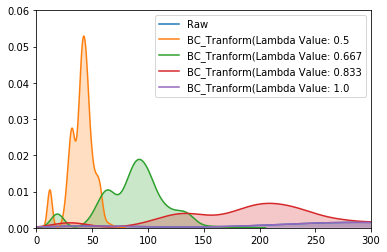

In [13]:
sns.kdeplot(garage_area, shade=True, label="Raw")
sns.kdeplot(xt[0], shade=True, label= f"BC_Tranform(Lambda Value: {round(lmbda[0],3)}")
sns.kdeplot(xt[1], shade=True, label= f"BC_Tranform(Lambda Value: {round(lmbda[1],3)}")
sns.kdeplot(xt[2], shade=True, label= f"BC_Tranform(Lambda Value: {round(lmbda[2],3)}")
sns.kdeplot(xt[3], shade=True, label= f"BC_Tranform(Lambda Value: {round(lmbda[3],3)}")

# control x and y limits
plt.ylim(0, 0.06)
plt.xlim(0, 300)


In [16]:
# The trick of Box-Cox transformation is to find lambda value, 
# however in practice this is quite affordable. The following function returns 
# the transformed variable, lambda value, confidence interval for lambda according to certain alpha level.

# garage_area_xt: transformed variable.
# maxlog: lambda
# interval: confidence interval

# http://dataunderthehood.com/2018/01/15/box-cox-transformation-with-python/
    
garage_area_xt, maxlog, interval = stats.boxcox(garage_area, alpha=0.95)

print (maxlog)
print (interval)
print (garage_area_xt)


0.8160600626586625
(0.8141811308374863, 0.8179400694776221)
[186.1103358  212.73378146 108.27722469 ... 142.05783508 125.42237163
 175.41959571]


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Comparing the Raw Input to the Transformed Output')

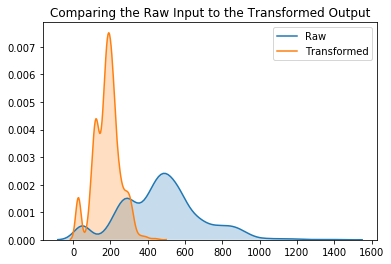

In [15]:
# Changes in the KDE... 
sns.kdeplot(garage_area, shade=True, label="Raw")
sns.kdeplot(garage_area_xt, shade=True, label="Transformed")
plt.title('Comparing the Raw Input to the Transformed Output')

In [19]:
## Z-Score (garage area)

garage_area_std = np.std(garage_area)

print (garage_area_std)

garage_area_Z = ((garage_area -garage_area.mean()) / (garage_area_std)) 

# plt.hist(garage_area_Z);

210.21733991088456


In [20]:
## Z-Score (garage area_xt)

garage_area_xt_std = np.std(garage_area_xt)

print (garage_area_xt_std)

garage_area_xt_Z = ((garage_area_xt - garage_area_xt.mean()) / (garage_area_xt_std))

# plt.hist(garage_area_xt_Z);

68.83887014955053


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


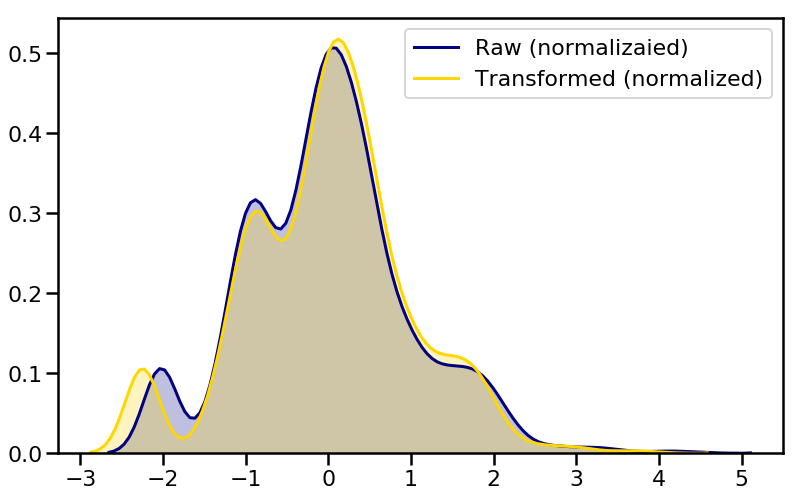

In [21]:
# Changes in the KDE!  

plt.figure(figsize=(13,8))
sns.set_context('poster')
sns.kdeplot(garage_area_Z, shade=True, color='navy', label="Raw (normalizaied)")
sns.kdeplot(garage_area_xt_Z, shade=True, color='gold', label="Transformed (normalized)")

## Using the sklearn Modele 

In [23]:
# Let's use two features...

print (df['Lot Area'].min())

1300


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


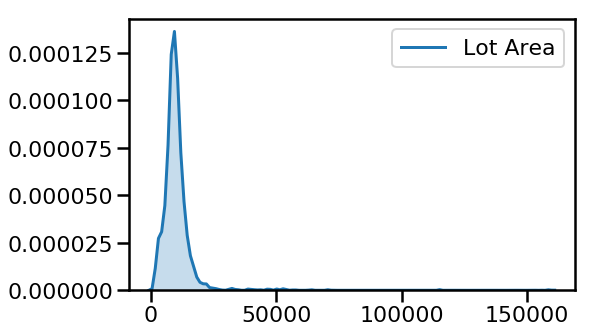

In [26]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Lot Area'], shade=True)

In [27]:
#Features 
X = df[['Garage Area', 'Lot Area']]

## Instantiate PowerTransformer 


### Parameters 

**method** : str, (default=’yeo-johnson’)

**standardize** : boolean, default=True
Set to True to apply zero-mean, unit-variance normalization to the transformed output.

### Attributes

**lambdas_**: array of float, shape (n_features,)
The parameters of the power transformation for the selected features.



In [29]:
pt = PowerTransformer(method='box-cox', standardize=True,) 

#Fit the data to the powertransformer
skl_boxcox = pt.fit(X)

In [30]:
#Here are the lambdas 
skl_boxcox.lambdas_

array([0.81606006, 0.15903681])

In [32]:
#Transform 
skl_boxcox = pt.transform(X)

In [55]:
# skl_boxcox

In [35]:
lot_area = np.asarray(df['Lot Area'])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


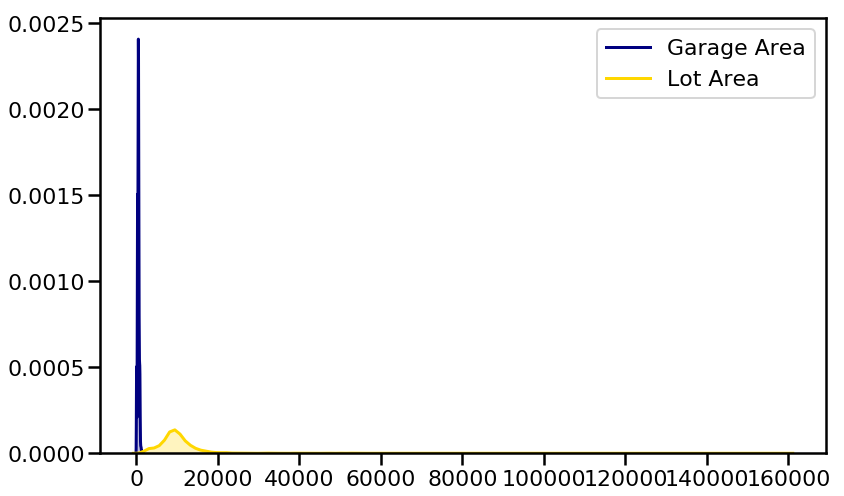

In [54]:
plt.figure(figsize=(13,8))
sns.set_context('poster')
sns.kdeplot(garage_area, shade=True, color='navy', label="Garage Area")
sns.kdeplot(lot_area, shade=True, color='gold', label="Lot Area")

# control x and y limits
# plt.ylim(0, 0.06)
# plt.xlim(0, 20_000)



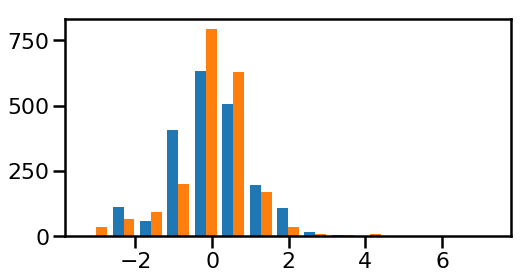

In [34]:
plt.figure(figsize=(8,4))
plt.hist(skl_boxcox, bins=15);

## Good Tidbits:

"Box-cox transformation is a statistical technique used to remove heteroscedasticity of a variable and also make it look like more normally distributed, which represents a big deal for statisticians and economists regarding normality and homoscedasticity assumptions for linear models."

http://dataunderthehood.com/2018/01/15/box-cox-transformation-with-python/



"For example, the data may have a skew, meaning that the bell in the bell shape may be pushed one way or another."

https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/



"But, generally the answer is that for most meaningful analysis, you need the same 𝜆 value for all datasets. The reason is that the Box-Cox transformation **not only changes the scale of the data, it also changes the unit of measurement**. "

https://stats.stackexchange.com/questions/243975/skewness-transformation-for-one-but-not-the-other-variable/243984#243984

https://stats.stackexchange.com/questions/243975/skewness-transformation-for-one-but-not-the-other-variable/243984#243984

#### References: 

http://www.kmdatascience.com/2017/07/box-cox-transformations-in-python.html

    